In [1]:
#Libraries
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor

In [2]:
#Loading Dataset
df=pd.read_csv(r"C:\Users\LENOVO\Desktop\dataset\house_prices - Copy.csv")
df.head(5)

,property_type,price,location,city,baths,purpose,bedrooms,Area_in_Marla
0,Flat,10000000,G-10,Islamabad,2,For Sale,2,4.0
1,Flat,6900000,E-11,Islamabad,3,For Sale,3,5.6
2,House,16500000,G-15,Islamabad,6,For Sale,5,8.0
3,House,43500000,Bani Gala,Islamabad,4,For Sale,4,40.0
4,House,7000000,DHA Defence,Islamabad,3,For Sale,3,8.0


In [7]:
len(df)

99499

In [8]:
# To remove outliers (optional)
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['price'] < (Q1 - 1.5 * IQR)) | (df['price'] > (Q3 + 1.5 * IQR)))]


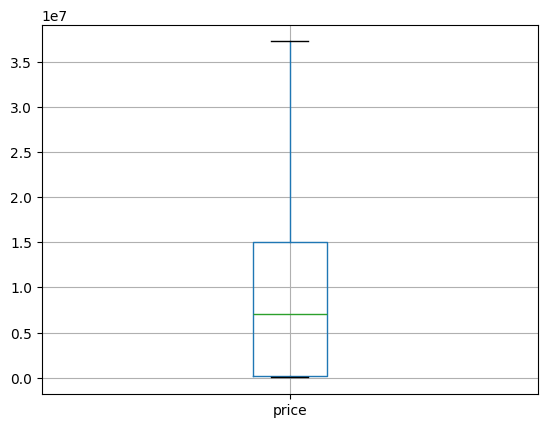

In [9]:
# Removing outliers based on the IQR method
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Only keep rows within the acceptable range
df = df[~((df['price'] < (Q1 - 1.5 * IQR)) | (df['price'] > (Q3 + 1.5 * IQR)))]

# Plot the new boxplot to verify if outliers are removed
boxplot = df.boxplot(column=['price'])
plt.show()


In [10]:
boxplot = df.boxplot(column=['Area_in_Marla'])

In [11]:
# To remove outliers (optional)
Q1 = df['Area_in_Marla'].quantile(0.25)
Q3 = df['Area_in_Marla'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['Area_in_Marla'] < (Q1 - 1.5 * IQR)) | (df['Area_in_Marla'] > (Q3 + 1.5 * IQR)))]


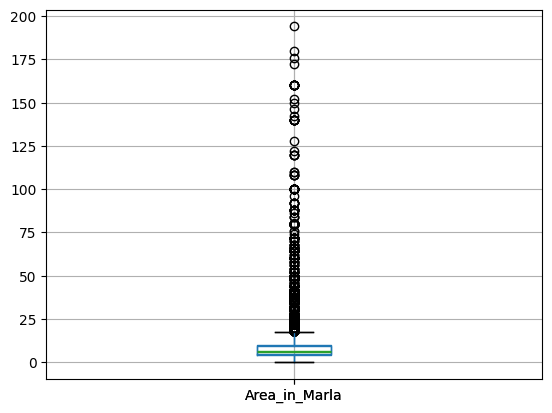

In [12]:
# Removing outliers based on the IQR method
Q1 = df['Area_in_Marla'].quantile(0.25)
Q3 = df['Area_in_Marla'].quantile(0.75)
IQR = Q3 - Q1

# Only keep rows within the acceptable range
df = df[~((df['Area_in_Marla'] < (Q1 - 1.5 * IQR)) | (df['Area_in_Marla'] > (Q3 + 1.5 * IQR)))]

# Plot the new boxplot to verify if outliers are removed
boxplot = df.boxplot(column=['Area_in_Marla'])
plt.show()


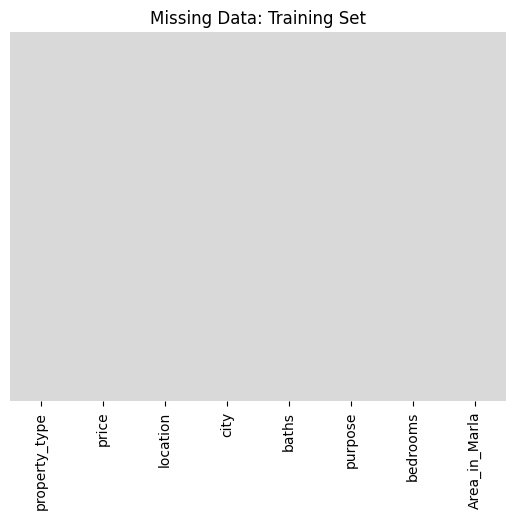

In [13]:
# Heatmap
import seaborn as sns
import matplotlib.pyplot as plt

# Create heatmap to show missing data
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='tab20c_r')
plt.title('Missing Data: Training Set')
plt.show()


In [14]:
df.head(5)

,property_type,price,location,city,baths,purpose,bedrooms,Area_in_Marla
0,Flat,10000000,G-10,Islamabad,2,For Sale,2,4.0
1,Flat,6900000,E-11,Islamabad,3,For Sale,3,5.6
2,House,16500000,G-15,Islamabad,6,For Sale,5,8.0
4,House,7000000,DHA Defence,Islamabad,3,For Sale,3,8.0
5,Flat,7800000,E-11,Islamabad,2,For Sale,2,6.2


In [15]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder instance
label_encoder = LabelEncoder()

# Fit the label encoder to each categorical column
df['property_type'] = label_encoder.fit_transform(df['property_type'])
df['location'] = label_encoder.fit_transform(df['location'])
df['city'] = label_encoder.fit_transform(df['city'])
df['purpose'] = label_encoder.fit_transform(df['purpose'])  

In [16]:
df.head(5)

,property_type,price,location,city,baths,purpose,bedrooms,Area_in_Marla
0,1,10000000,444,1,2,1,2,4.0
1,1,6900000,377,1,3,1,3,5.6
2,2,16500000,449,1,6,1,5,8.0
4,2,7000000,322,1,3,1,3,8.0
5,1,7800000,377,1,2,1,2,6.2


In [17]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Reshape the price column to fit the scaler
df['price'] = scaler.fit_transform(df[['price']])
df['location'] = scaler.fit_transform(df[['location']])
df['Area_in_Marla'] = scaler.fit_transform(df[['Area_in_Marla']])

In [18]:
df.head(5)  

,property_type,price,location,city,baths,purpose,bedrooms,Area_in_Marla
0,1,0.045640,-0.226721,1,2,1,2,-0.856643
1,1,-0.310441,-0.422168,1,3,1,3,-0.338489
2,2,0.792264,-0.212135,1,6,1,5,0.438741
4,2,-0.298955,-0.582609,1,3,1,3,0.438741
5,1,-0.207063,-0.422168,1,2,1,2,-0.144182


In [19]:
# seperate dependent and independent variable
x=df.iloc[:,1:]
y=df['price']


In [20]:
# Spliting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [21]:
from sklearn.ensemble import RandomForestRegressor

# Build the model
model = RandomForestRegressor(n_estimators=10, random_state=0)
model.fit(X_train, y_train)



RandomForestRegressor(n_estimators=10, random_state=0)

In [22]:
# Prediction
y_pred= model.predict(X_test)

In [23]:
# Score check
model.score(X_test,y_test)

0.9999999197696771

In [24]:
loss= model.score(X_test,y_test)

print(loss)

0.9999999197696771


In [25]:
from sklearn.metrics import mean_squared_error, r2_score
import math
from math import sqrt

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = sqrt(mse)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')
print(rmse)


Mean Squared Error: 7.986298414956308e-08
R² Score: 0.9999999197696771
0.0002826003965842282


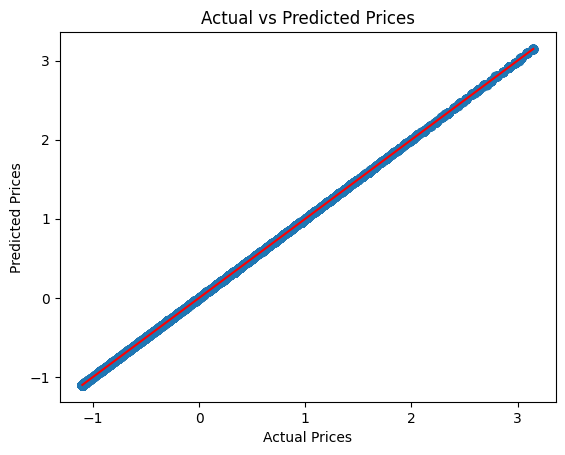

In [26]:
# Visualizing the predictions
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line for perfect predictions
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()
